In [2]:
import pandas as NewsDetPd
import warnings as NewsDetWng
NewsDetWng.filterwarnings('ignore')
News_Detect = NewsDetPd.read_csv("ProcessedNews_Covid19.csv")
News_Detect

,Text,Label
0,Tencent revealed the real number of deaths.\t\t,0
1,Taking chlorine dioxide helps fight coronavir...,0
2,This video shows workmen uncovering a bat-inf...,0
3,The Asterix comic books and The Simpsons pred...,0
4,Chinese President Xi Jinping visited a mosque...,0
...,...,...
7251,Global COVID-19 prevention trial of hydroxychl...,1
7252,Bavaria's free COVID-19 test for all splits Ge...,1
7253,Britain locks down city of Leicester after COV...,1
7254,UK imposes lockdown on city of Leicester to cu...,1


In [3]:
News_Detect.info()
News_Detect['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7256 non-null   object
 1   Label   7256 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.5+ KB


,count
Label,
1,3792
0,3464


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer as NewsDet_Tfvect
from sklearn.decomposition import PCA as NewsDetPcomponent
from sklearn.model_selection import train_test_split as NewsDet_trntst

#======== Input and Output
News_DetectX = News_Detect.drop('Label',axis=1)
News_DetectY = News_Detect['Label']

#======== Vectorization Covid19
NewsDetect_Vtc = NewsDet_Tfvect(analyzer='word',ngram_range= (1,1))
News_DetectX = NewsDetect_Vtc.fit_transform(News_Detect['Text'].values.astype('U')).toarray()
print("Vectorized Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Reducting Dimensions Covid19
newsdetPca = NewsDetPcomponent(n_components = 100)
News_DetectX = newsdetPca.fit_transform(News_DetectX)
print("\nReduction Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Splitting 60-20-20 ratio Covid19
News_Detect['Label'] = News_Detect['Label'].astype(int)
NewsDetX_tr, NewsDetX_ts, NewsDetY_tr, NewsDetY_ts = NewsDet_trntst(News_DetectX, News_Detect['Label'], test_size=0.4, random_state=70)
NewsDetX_va, NewsDetX_ts, NewsDetY_va, NewsDetY_ts = NewsDet_trntst(NewsDetX_ts, NewsDetY_ts, test_size=0.5, random_state=70)
print("\nTraining Covid19 without FastText News: ",NewsDetX_tr.shape)
print("Validation Covid19 without FastText News: ",NewsDetX_va.shape)
print("Testing Covid19 without FastText News: ",NewsDetX_ts.shape)

Vectorized Shape of Covid19 FastText News:  (7256, 17446)

Reduction Shape of Covid19 FastText News:  (7256, 100)

Training Covid19 without FastText News:  (4353, 100)
Validation Covid19 without FastText News:  (1451, 100)
Testing Covid19 without FastText News:  (1452, 100)


### CNN Model

Note: changing filters as '64' and kernel size as '7', epochs as 100 as common for hypertuning.

3 layers

=============== Performance of CNN 3 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5626 - loss: 0.2428 - val_accuracy: 0.6306 - val_loss: 0.2211
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6604 - loss: 0.2096 - val_accuracy: 0.6699 - val_loss: 0.1907
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7327 - loss: 0.1733 - val_accuracy: 0.5713 - val_loss: 0.2604
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6949 - loss: 0.1930 - val_accuracy: 0.7312 - val_loss: 0.1637
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7682 - loss: 0.1533 - val_accuracy: 0.7588 - val_loss: 0.1530
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7811 - loss: 0.1461 - val_accuracy: 0.7677 - val_loss: 0.1498
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7953 - loss: 0.1451 - val_accuracy: 0.5844 - val_loss: 0.2930
Epoch 8/100
88/88 ━━━━━━━━━━━━━

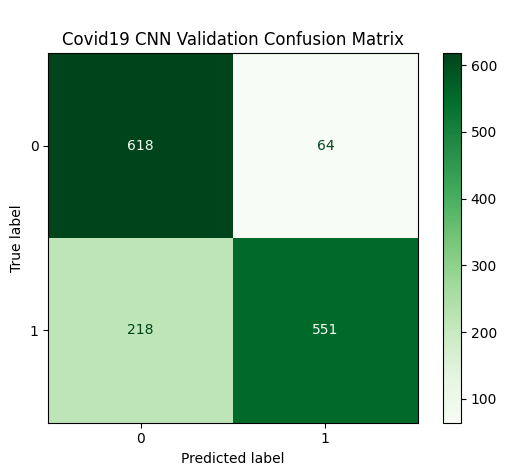

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       670
           1       0.90      0.72      0.80       782

    accuracy                           0.81      1452
   macro avg       0.82      0.81      0.81      1452
weighted avg       0.82      0.81      0.81      1452



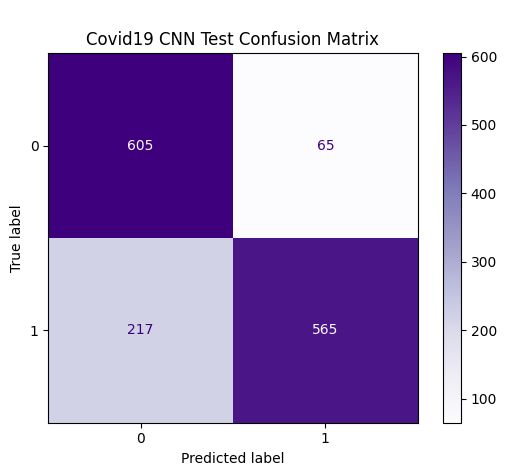

In [5]:
import numpy as NewsDetNpp
import matplotlib.pyplot as Newsplt
from tensorflow.keras.models import Sequential as NewsDetSeqnt
from tensorflow.keras.optimizers import Adam as NewsDetAdmm
from sklearn.metrics import classification_report as NewsDetClfrpt
from sklearn.metrics import confusion_matrix as NewsDetCnMtrx
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Flatten, Input
from sklearn.metrics import ConfusionMatrixDisplay as NewsDetDsp

NewsDetIp_shape = NewsDetX_tr.shape[1]

#======== Define CNN model for Covid19
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 3 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()


4 layers

=============== Performance of CNN 4 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5181 - loss: 0.2467 - val_accuracy: 0.6423 - val_loss: 0.2263
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6567 - loss: 0.2109 - val_accuracy: 0.7512 - val_loss: 0.1658
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7345 - loss: 0.1755 - val_accuracy: 0.7429 - val_loss: 0.1658
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7653 - loss: 0.1598 - val_accuracy: 0.7243 - val_loss: 0.1902
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7637 - loss: 0.1643 - val_accuracy: 0.7429 - val_loss: 0.1829
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7460 - loss: 0.1679 - val_accuracy: 0.7691 - val_loss: 0.1628
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7833 - loss: 0.1461 - val_accuracy: 0.6975 - val_loss: 0.1894
Epoch 8/100
88/88 ━━━━━━━━━━━━

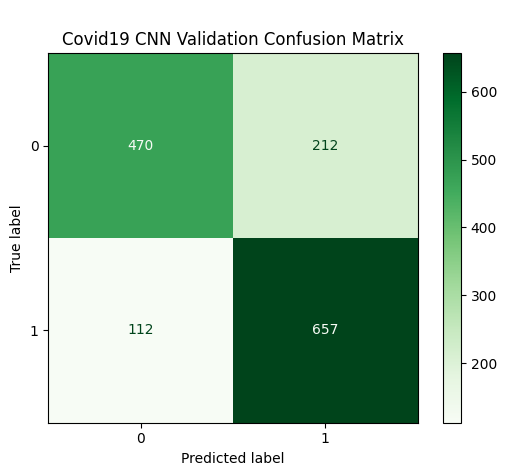

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       670
           1       0.75      0.88      0.81       782

    accuracy                           0.78      1452
   macro avg       0.79      0.77      0.77      1452
weighted avg       0.79      0.78      0.78      1452



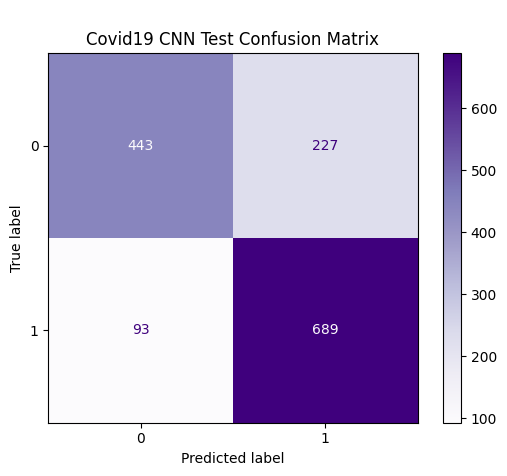

In [6]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 4 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

5 layers

=============== Performance of CNN 5 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5592 - loss: 0.2399 - val_accuracy: 0.7009 - val_loss: 0.2049
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6688 - loss: 0.2012 - val_accuracy: 0.7057 - val_loss: 0.1919
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7381 - loss: 0.1708 - val_accuracy: 0.7340 - val_loss: 0.1676
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7542 - loss: 0.1620 - val_accuracy: 0.7622 - val_loss: 0.1551
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7702 - loss: 0.1518 - val_accuracy: 0.7857 - val_loss: 0.1535
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7832 - loss: 0.1502 - val_accuracy: 0.7677 - val_loss: 0.1507
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7896 - loss: 0.1466 - val_accuracy: 0.7526 - val_loss: 0.1553
Epoch 8/100
88/88 ━━━━━━━━━━

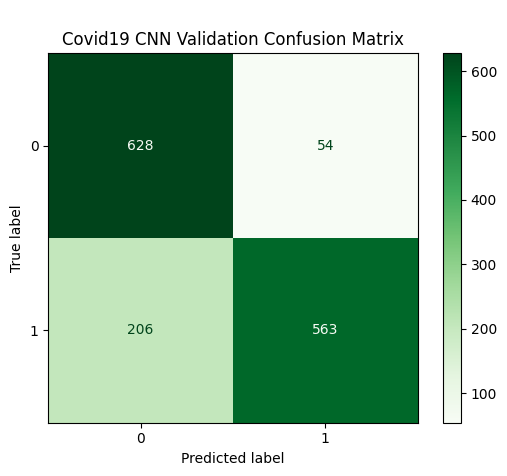

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       670
           1       0.89      0.75      0.81       782

    accuracy                           0.82      1452
   macro avg       0.82      0.82      0.82      1452
weighted avg       0.83      0.82      0.82      1452



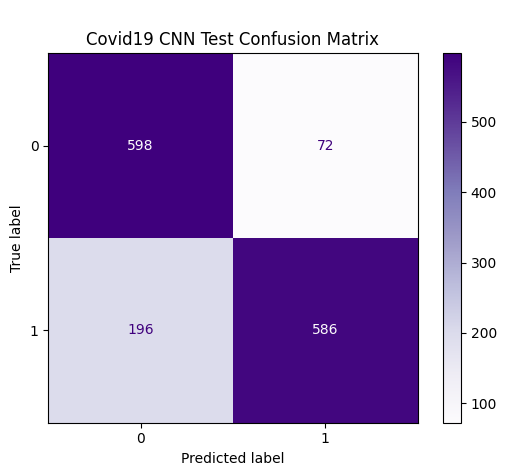

In [7]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 5 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'relu'

=============== Performance of CNN Activation 'relu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5427 - loss: 0.2461 - val_accuracy: 0.6533 - val_loss: 0.2156
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6651 - loss: 0.2047 - val_accuracy: 0.6285 - val_loss: 0.2218
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7312 - loss: 0.1782 - val_accuracy: 0.7602 - val_loss: 0.1550
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7545 - loss: 0.1653 - val_accuracy: 0.7236 - val_loss: 0.1770
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7703 - loss: 0.1566 - val_accuracy: 0.7691 - val_loss: 0.1536
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7487 - loss: 0.1709 - val_accuracy: 0.7870 - val_loss: 0.1446
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8001 - loss: 0.1403 - val_accuracy: 0.7884 - val_loss: 0.1431
Epoch 8/100
88/88 ━━━━━━

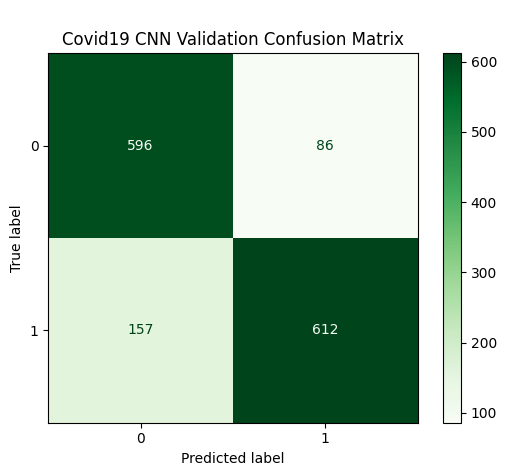

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       670
           1       0.87      0.81      0.84       782

    accuracy                           0.83      1452
   macro avg       0.83      0.83      0.83      1452
weighted avg       0.83      0.83      0.83      1452



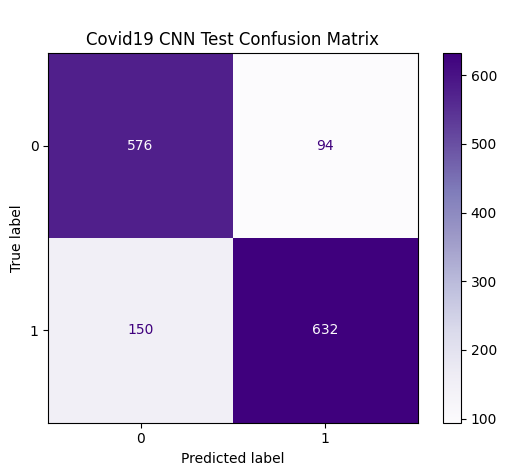

In [11]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'relu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'elu'

=============== Performance of CNN Activation 'elu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5400 - loss: 0.2447 - val_accuracy: 0.5858 - val_loss: 0.2481
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6713 - loss: 0.2097 - val_accuracy: 0.7236 - val_loss: 0.1768
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7479 - loss: 0.1666 - val_accuracy: 0.7319 - val_loss: 0.1796
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7699 - loss: 0.1533 - val_accuracy: 0.7340 - val_loss: 0.1678
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7518 - loss: 0.1615 - val_accuracy: 0.7567 - val_loss: 0.1622
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7910 - loss: 0.1436 - val_accuracy: 0.7760 - val_loss: 0.1505
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8129 - loss: 0.1345 - val_accuracy: 0.7498 - val_loss: 0.1692
Epoch 8/100
88/88 ━

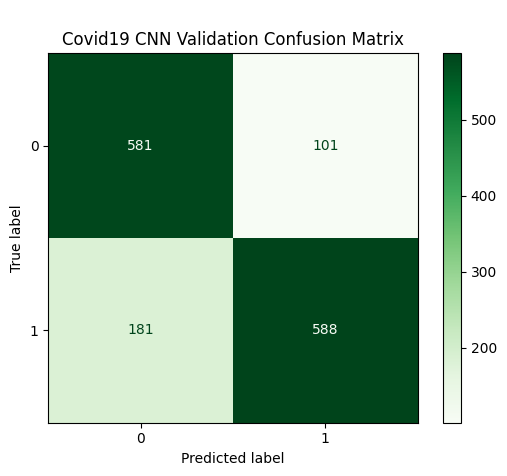

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       670
           1       0.86      0.80      0.83       782

    accuracy                           0.82      1452
   macro avg       0.82      0.83      0.82      1452
weighted avg       0.83      0.82      0.82      1452



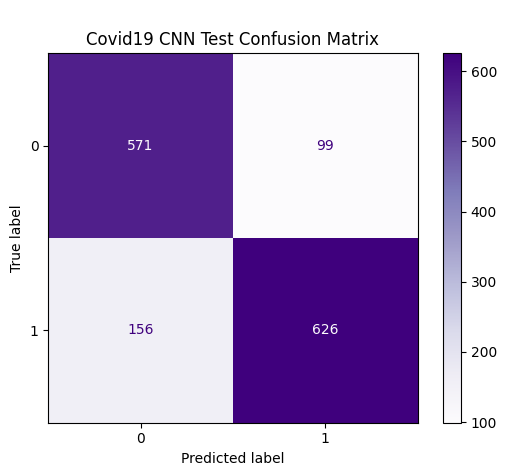

In [12]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='elu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'elu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'adamW'

=============== Performance of CNN Optimizer 'adamW' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5103 - loss: 0.2483 - val_accuracy: 0.5941 - val_loss: 0.2246
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5867 - loss: 0.2266 - val_accuracy: 0.6113 - val_loss: 0.2240
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6547 - loss: 0.2074 - val_accuracy: 0.7478 - val_loss: 0.1683
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7196 - loss: 0.1832 - val_accuracy: 0.7443 - val_loss: 0.1649
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7580 - loss: 0.1592 - val_accuracy: 0.6471 - val_loss: 0.2301
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7240 - loss: 0.1856 - val_accuracy: 0.7870 - val_loss: 0.1462
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8031 - loss: 0.1378 - val_accuracy: 0.7705 - val_loss: 0.1565
Epoch 8/100
88/88 ━━━

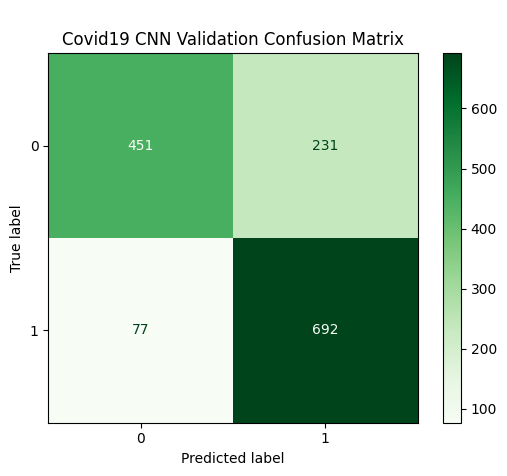

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.73       670
           1       0.74      0.92      0.82       782

    accuracy                           0.78      1452
   macro avg       0.81      0.77      0.77      1452
weighted avg       0.80      0.78      0.78      1452



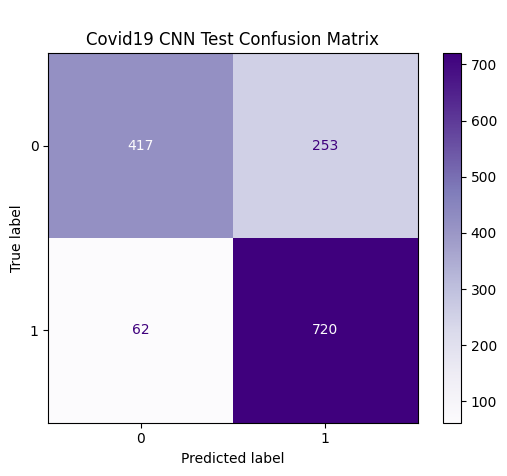

In [13]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adamW', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'adamW' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'rmsprop'

=============== Performance of CNN Optimizer 'rmsprop' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5180 - loss: 0.2494 - val_accuracy: 0.5734 - val_loss: 0.2461
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5779 - loss: 0.2401 - val_accuracy: 0.6127 - val_loss: 0.2234
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6395 - loss: 0.2165 - val_accuracy: 0.5513 - val_loss: 0.2528
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6776 - loss: 0.2028 - val_accuracy: 0.7147 - val_loss: 0.1875
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7049 - loss: 0.1884 - val_accuracy: 0.5307 - val_loss: 0.3619
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7008 - loss: 0.1935 - val_accuracy: 0.5713 - val_loss: 0.2773
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7268 - loss: 0.1801 - val_accuracy: 0.7526 - val_loss: 0.1640
Epoch 8/100
88/88 ━

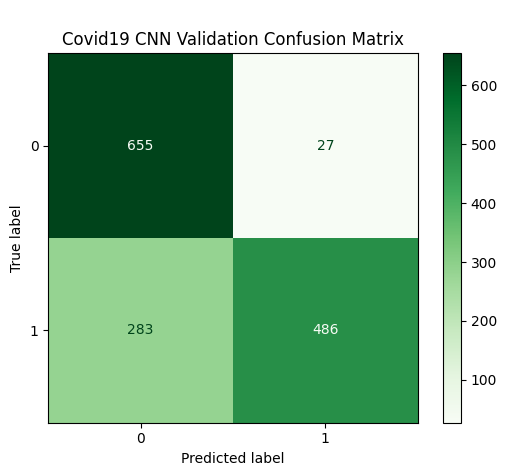

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       670
           1       0.95      0.67      0.79       782

    accuracy                           0.80      1452
   macro avg       0.83      0.82      0.80      1452
weighted avg       0.84      0.80      0.80      1452



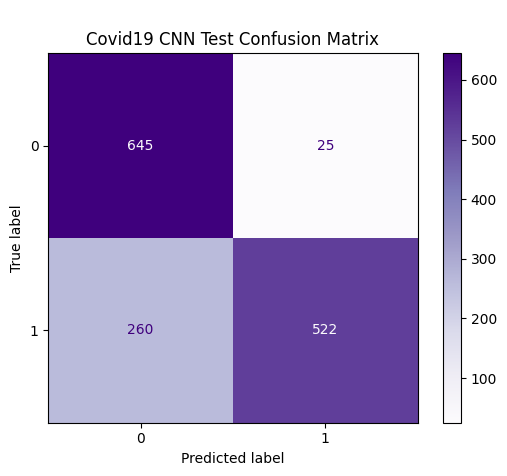

In [14]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'rmsprop' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

1. using 3 different hidden layers (3, 4, 5) and this have the activation (tanh), optimizer (adam).
2. take the best layer of 5 and hypertuning the activation (relu) and (elu).
3. take the best activation 'relu' and hypertuning the optimizers (adamW) and (rmsprop).